In [143]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline


In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
# Data Preperation Module 1
# m1ml,m1mg,
# Import first Lecturer Grades

#module1lg = pd.read_csv('Module1-LecturersGrades.csv',index_col = 'Student Id')
# Index column is student ID
# Student ID -> module1lg
module1lg = pd.read_csv('Module1-LecturersGrades.csv')

In [7]:
# module1mg = pd.read_csv('Module1-MoodleGrades.csv', index_col = 'ID number')
# ID number is primary index col

# Index column is privalged column in pandas providing conviement to series or dataframe rows
module1mg = pd.read_csv('Module1-MoodleGrades.csv')
# Module 1 mg has 4,5,6,7, MCQ Final

In [8]:
# Data prep Module 1
module1ml = pd.read_csv('Module1-MoodleLogs.csv')
# Module logs

In [10]:
module1lg.dtypes
# id is int

id                     int64
Student Id            object
Name                  object
% CA                   int64
% exam                 int64
Average              float64
Final(Rounded Up)      int64
dtype: object

In [11]:
module1mg.dtypes
# Mostly floats and ints
# ID number to change to int

First name                                      object
Surname                                         object
ID number                                       object
Email address                                   object
Course total (Real)                            float64
Last downloaded from this course                 int64
Assignment: Group 1 - Practical Test (Real)      int64
Assignment: Group 2 - Practical Test (Real)      int64
Assignment: Group 3 - Practical Test (Real)      int64
Assignment: Group 4 - Practical Test (Real)      int64
Assignment: Group 5 - Practical Test (Real)      int64
Assignment: Group 6 - Practical Test (Real)      int64
Assignment: Group 7 - Practical Test (Real)      int64
Assignment: Late Practical (Real)                int64
Quiz: Group 1 MCQ (Real)                         int64
Quiz: Group 1 - MCQ2 (Real)                      int64
Quiz: Group 2 MCQ (Real)                         int64
Quiz: Group 2 - MCQ2 (Real)                      int64
Quiz: Grou

In [12]:
module1ml.dtypes
# Are all objects
# Need to split strings

Time              object
User full name    object
Affected user     object
Event context     object
Component         object
Event name        object
Description       object
Origin            object
IP address        object
dtype: object

In [9]:
# Engaged

#Engaged1mg = > 55
engaged1mg = module1mg['Course total (Real)'] > 55


In [94]:
engaged1mg.sum()

25

In [14]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module1mg['engaged'] = np.where(module1mg['Course total (Real)']>=55, '1', '0')

In [15]:
module1mg['engaged'] = pd.to_numeric(module1mg['engaged'])


In [16]:
module1mg.dtypes

First name                                      object
Surname                                         object
ID number                                       object
Email address                                   object
Course total (Real)                            float64
Last downloaded from this course                 int64
Assignment: Group 1 - Practical Test (Real)      int64
Assignment: Group 2 - Practical Test (Real)      int64
Assignment: Group 3 - Practical Test (Real)      int64
Assignment: Group 4 - Practical Test (Real)      int64
Assignment: Group 5 - Practical Test (Real)      int64
Assignment: Group 6 - Practical Test (Real)      int64
Assignment: Group 7 - Practical Test (Real)      int64
Assignment: Late Practical (Real)                int64
Quiz: Group 1 MCQ (Real)                         int64
Quiz: Group 1 - MCQ2 (Real)                      int64
Quiz: Group 2 MCQ (Real)                         int64
Quiz: Group 2 - MCQ2 (Real)                      int64
Quiz: Grou

In [17]:
print (module1mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Group 1 - Practical Test (Real)', 'Assignment: Group 2 - Practical Test (Real)', 'Assignment: Group 3 - Practical Test (Real)', 'Assignment: Group 4 - Practical Test (Real)', 'Assignment: Group 5 - Practical Test (Real)', 'Assignment: Group 6 - Practical Test (Real)', 'Assignment: Group 7 - Practical Test (Real)', 'Assignment: Late Practical (Real)', 'Quiz: Group 1 MCQ (Real)', 'Quiz: Group 1 - MCQ2 (Real)', 'Quiz: Group 2 MCQ (Real)', 'Quiz: Group 2 - MCQ2 (Real)', 'Quiz: Group 3 MCQ (Real)', 'Quiz: Group 3 - MCQ2 (Real)', 'Quiz: Group 4 MCQ (Real)', 'Quiz: Group 4 - MCQ2 (Real)', 'Quiz: Group 5 MCQ (Real)', 'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)', 'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)', 'Quiz: Group 7 - MCQ2 (Real)', 'Quiz: Late MCQ1 (Real)', 'Quiz: Late MCQ2 (Real)', 'engaged']


In [18]:
module1mg.head(2)

,First name,Surname,ID number,Email address,Course total (Real),Last downloaded from this course,Assignment: Group 1 - Practical Test (Real),Assignment: Group 2 - Practical Test (Real),Assignment: Group 3 - Practical Test (Real),Assignment: Group 4 - Practical Test (Real),...,Quiz: Group 4 - MCQ2 (Real),Quiz: Group 5 MCQ (Real),Quiz: Group 5 - MCQ2 (Real),Quiz: Group 6 MCQ (Real),Quiz: Group 6 - MCQ2 (Real),Quiz: Group 7 MCQ (Real),Quiz: Group 7 - MCQ2 (Real),Quiz: Late MCQ1 (Real),Quiz: Late MCQ2 (Real),engaged
0,a8NM,bDqB,U8NMDqBG,U8NMDqBG@student.itb.ie,46.67,1550739556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,aSnR,bGk9,VSnRGk9O,VSnRGk9O@student.itb.ie,36.67,1550739556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Selecting columns
# Columns1mg
m1mg = module1mg[[ 'First name', 'Surname','ID number','Course total (Real)','Quiz: Group 4 MCQ (Real)','Quiz: Group 5 MCQ (Real)','Quiz: Group 5 - MCQ2 (Real)','Quiz: Group 6 MCQ (Real)','Quiz: Group 6 - MCQ2 (Real)','Quiz: Group 7 MCQ (Real)','Quiz: Group 7 - MCQ2 (Real)','Quiz: Late MCQ1 (Real)','Quiz: Late MCQ2 (Real)']]


In [49]:
m1mg.head(2)

,First name,Surname,ID number,Course total (Real),Quiz: Group 4 MCQ (Real),Quiz: Group 5 MCQ (Real),Quiz: Group 5 - MCQ2 (Real),Quiz: Group 6 MCQ (Real),Quiz: Group 6 - MCQ2 (Real),Quiz: Group 7 MCQ (Real),Quiz: Group 7 - MCQ2 (Real),Quiz: Late MCQ1 (Real),Quiz: Late MCQ2 (Real)
0,a8NM,bDqB,U8NMDqBG,46.67,7,0,0,0,0,0,0,0,0
1,aSnR,bGk9,VSnRGk9O,36.67,0,0,0,0,0,0,0,0,0


In [50]:
m1mg.describe().transpose()
# Generates descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Course total (Real),122.0,43.060246,19.182017,0.0,33.33,43.33,53.33,93.33
Quiz: Group 4 MCQ (Real),122.0,0.827869,2.475308,0.0,0.00,0.00,0.00,14.00
Quiz: Group 5 MCQ (Real),122.0,0.942623,2.613693,0.0,0.00,0.00,0.00,12.00
Quiz: Group 5 - MCQ2 (Real),122.0,0.819672,2.256364,0.0,0.00,0.00,0.00,11.00
Quiz: Group 6 MCQ (Real),122.0,0.811475,2.224328,0.0,0.00,0.00,0.00,10.00
Quiz: Group 6 - MCQ2 (Real),122.0,1.073770,2.960255,0.0,0.00,0.00,0.00,13.00
Quiz: Group 7 MCQ (Real),122.0,0.827869,2.478645,0.0,0.00,0.00,0.00,13.00
Quiz: Group 7 - MCQ2 (Real),122.0,0.770492,2.452143,0.0,0.00,0.00,0.00,13.00
Quiz: Late MCQ1 (Real),122.0,0.196721,1.263861,0.0,0.00,0.00,0.00,10.00
Quiz: Late MCQ2 (Real),122.0,0.040984,0.452679,0.0,0.00,0.00,0.00,5.00


In [69]:
m1mg.sort_index()
# Sorting index
# Sorts number then alphabetically

,First name,Surname,ID number,Course total (Real),Quiz: Group 4 MCQ (Real),Quiz: Group 5 MCQ (Real),Quiz: Group 5 - MCQ2 (Real),Quiz: Group 6 MCQ (Real),Quiz: Group 6 - MCQ2 (Real),Quiz: Group 7 MCQ (Real),Quiz: Group 7 - MCQ2 (Real),Quiz: Late MCQ1 (Real),Quiz: Late MCQ2 (Real)
0,a8NM,bDqB,U8NMDqBG,46.67,7,0,0,0,0,0,0,0,0
1,aSnR,bGk9,VSnRGk9O,36.67,0,0,0,0,0,0,0,0,0
2,aAK5,bSAb,tAK5SAbE,53.33,0,0,0,0,0,0,0,0,0
3,a4jV,bO8M,14jVO8M7,0.00,0,0,0,0,0,0,0,0,0
4,aa14,bMdv,ba14Mdv9,46.67,0,0,0,0,0,0,0,0,0
5,am5M,b1HG,um5M1HGl,36.67,0,7,4,0,0,0,0,0,0
6,aL20,blLY,6L20lLYB,60.00,0,0,0,0,0,0,0,0,0
7,aw97,baOy,fw97aOyU,30.00,0,0,0,0,0,0,0,0,0
8,atVF,bWWA,btVFWWA9,56.67,0,9,8,0,0,0,0,0,0
9,azCY,bvQB,tzCYvQBD,46.67,0,0,0,5,9,0,0,0,0


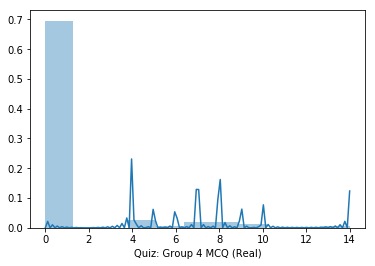

In [51]:
# Visualize the distribution of 'Quiz: Group 4 MCQ (Real)'
sns.distplot(m1mg['Quiz: Group 4 MCQ (Real)'])


In [52]:
m1mg.describe()

,Course total (Real),Quiz: Group 4 MCQ (Real),Quiz: Group 5 MCQ (Real),Quiz: Group 5 - MCQ2 (Real),Quiz: Group 6 MCQ (Real),Quiz: Group 6 - MCQ2 (Real),Quiz: Group 7 MCQ (Real),Quiz: Group 7 - MCQ2 (Real),Quiz: Late MCQ1 (Real),Quiz: Late MCQ2 (Real)
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,43.060246,0.827869,0.942623,0.819672,0.811475,1.073770,0.827869,0.770492,0.196721,0.040984
std,19.182017,2.475308,2.613693,2.256364,2.224328,2.960255,2.478645,2.452143,1.263861,0.452679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,93.330000,14.000000,12.000000,11.000000,10.000000,13.000000,13.000000,13.000000,10.000000,5.000000


In [53]:
print(m1mg['Course total (Real)'].value_counts(dropna=False))
# What are the value counts of the different marks


46.67    12
53.33    11
40.00    11
0.00     10
50.00    10
43.33    10
36.67    10
26.67     9
33.33     6
56.67     6
30.00     6
60.00     5
73.33     5
80.00     2
66.67     2
20.00     2
83.33     2
70.00     1
93.33     1
76.67     1
Name: Course total (Real), dtype: int64


In [54]:
# Describe the column
print(m1mg['Course total (Real)'].describe())


count    122.000000
mean      43.060246
std       19.182017
min        0.000000
25%       33.330000
50%       43.330000
75%       53.330000
max       93.330000
Name: Course total (Real), dtype: float64


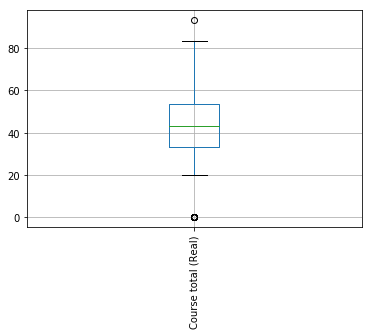

In [56]:
# Create the boxplot
m1mg.boxplot(column='Course total (Real)', rot=90)


In [57]:
m1mg.head(2)

,First name,Surname,ID number,Course total (Real),Quiz: Group 4 MCQ (Real),Quiz: Group 5 MCQ (Real),Quiz: Group 5 - MCQ2 (Real),Quiz: Group 6 MCQ (Real),Quiz: Group 6 - MCQ2 (Real),Quiz: Group 7 MCQ (Real),Quiz: Group 7 - MCQ2 (Real),Quiz: Late MCQ1 (Real),Quiz: Late MCQ2 (Real)
0,a8NM,bDqB,U8NMDqBG,46.67,7,0,0,0,0,0,0,0,0
1,aSnR,bGk9,VSnRGk9O,36.67,0,0,0,0,0,0,0,0,0


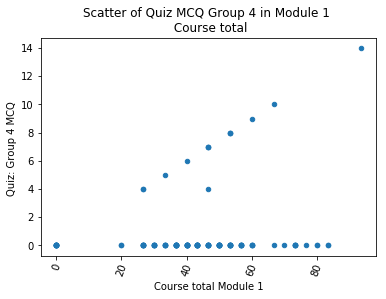

In [63]:
m1mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: Group 4 MCQ (Real)', rot=70)
# For scatter plot value must be numberic
# Add title and labels
plt.title('Scatter of Quiz MCQ Group 4 in Module 1 \n Course total')
plt.xlabel('Course total Module 1')
plt.ylabel('Quiz: Group 4 MCQ ')



In [88]:
#pearcorr = stats.pearsonr(m1mg.'Course total (Real)',m1mg.'Quiz: Group 4 MCQ (Real)')

In [20]:
module1ml.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,IP address
0,"20/02/19, 01:56",ansW buTW,-,File: Lecture 10,File,Course module viewed,The user with id '0' viewed the 'resource' act...,web,127.0.0.1
1,"20/02/19, 01:56",ansW buTW,-,Course: Module 1,System,Course viewed,The user with id '0' viewed the course with id...,web,127.0.0.1


In [22]:
# Date
#
#
#time1
time1 = module1ml["Time"].str.split(",", n = 1, expand = True)

In [23]:
# making separate Date column from new data frame 
module1ml["Date"]= time1[0] 

# making seperate Time column from new data frame
module1ml['Time']= time1[1]

In [24]:
# Convert the date column to datetime64
module1ml.Date = pd.to_datetime(module1ml.Date)

In [25]:
module1ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
dtype: object

In [30]:
# Name split
# new data frame with split value columns 
new1 = module1ml["User full name"].str.split(" ", n = 1, expand = True)


In [31]:
# making separate first name column from new data frame 
module1ml["First name"]= new1[0] 

In [32]:
# making separate last name column from new data frame 
module1ml["Last name"]= new1[1] 

In [33]:
module1ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
First name                object
Last name                 object
dtype: object

In [26]:
#Remove activity outside semester start and end dates range -Timeedit1
mask1 = (module1ml['Date'] >= StartDate) & (module1ml['Date'] <= EndDate)

module1ml = module1ml.loc[mask1]

len(module1ml)

11451

In [126]:
mask1.head(2)

0    False
1    False
Name: Date, dtype: bool

In [27]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_1 = (module1ml['Date'] >= StartDate) & (module1ml['Date'] <= TriOne)

FirstFive1 = module1ml.loc[week5_1]

len(FirstFive1)

3831

In [34]:
# Generates descriptive statistics
week5_1.describe().transpose()

count     11451
unique        2
top       False
freq       7620
Name: Date, dtype: object

In [28]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_1 = (module1ml['Date'] >= TriOne) & (module1ml['Date'] <= TriTwo)

FirstTen1 = module1ml.loc[week10_1]

len(FirstTen1)

3982

In [29]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_1 = (module1ml['Date'] >= TriTwo) & (module1ml['Date'] <= EndDate)

FirstFivt1 = module1ml.loc[week15_1]

len(FirstFivt1)

4410

In [35]:
#drop1ml

In [36]:
module1ml = module1ml.drop(module1ml[['IP address','Origin','Description','Affected user']], axis=1)


In [37]:
module1ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
136,21:48,a7t7 bfTq,Course: Module 1,User report,Grade user report viewed,2019-01-02,a7t7,bfTq
137,21:48,a7t7 bfTq,Course: Module 1,System,Course viewed,2019-01-02,a7t7,bfTq


In [40]:
week5_1.head(2)

136    False
137    False
Name: Date, dtype: bool

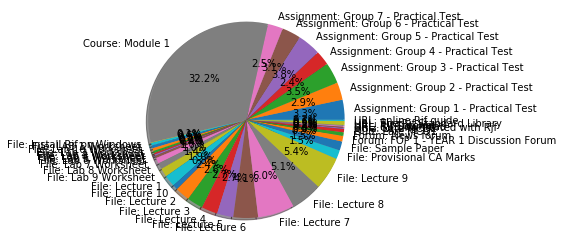

In [41]:
labels = FirstFivt1['Event context'].astype('category').cat.categories.tolist()
counts = FirstFivt1['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

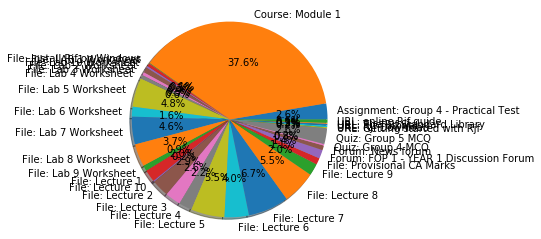

In [42]:
labels = FirstTen1['Event context'].astype('category').cat.categories.tolist()
counts = FirstTen1['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [43]:
FirstFivt1["Description"].value_counts()


The user with id '0' viewed the 'resource' activity with course module id '0'.                                                                       1884
The user with id '0' viewed the course with id '558'.                                                                                                1143
The user with id '0' has viewed the submission status page for the assignment with course module id '0'.                                              412
The user with id '0' viewed the user report in the gradebook.                                                                                         168
The user with id '0' viewed their submission for the assignment with course module id '0'.                                                            135
The user with id '0' has accepted the statement of the submission with id '0' for the assignment with course module id '0'.                           100
The user with id '0' has uploaded a file to the submission with id '0' in th

In [44]:
FirstFivt1["Event context"].value_counts()
# The files from in Lecture 1 go from Lecture 2 to Lecture 9
# All the quizess will get higher weigthing

Course: Module 1                          1422
File: Lecture 7                            266
File: Lecture 9                            239
File: Lecture 8                            226
File: Lecture 6                            179
Assignment: Group 5 - Practical Test       169
Assignment: Group 3 - Practical Test       153
Assignment: Group 1 - Practical Test       145
Assignment: Group 6 - Practical Test       137
Assignment: Group 2 - Practical Test       128
File: Lecture 5                            118
File: Lecture 4                            117
File: Lecture 3                            116
Assignment: Group 7 - Practical Test       110
File: Lecture 2                            106
Assignment: Group 4 - Practical Test       105
File: Lecture 1                             84
File: Provisional CA Marks                  65
File: Sample Paper                          65
File: Lab 9 Worksheet                       63
File: Lab 8 Worksheet                       44
File: Lab 7 W

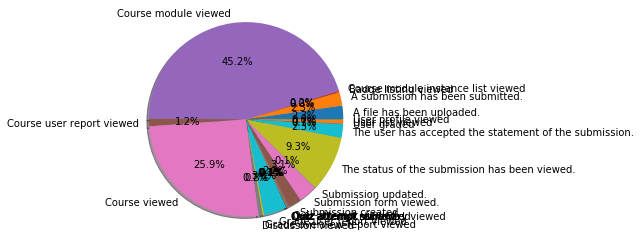

In [46]:
labels = FirstFivt1['Event name'].astype('category').cat.categories.tolist()
counts = FirstFivt1['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

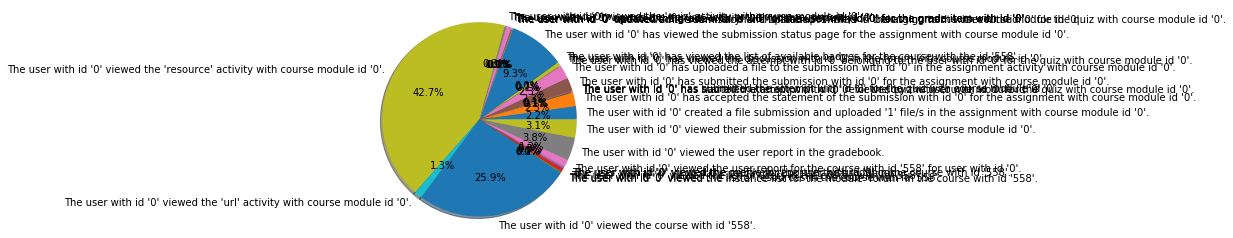

In [47]:
labels = FirstFivt1['Description'].astype('category').cat.categories.tolist()
counts = FirstFivt1['Description'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [45]:
module1ml["Event context"].value_counts()
# The files from in Lecture 1 go from Lecture 2 to Lecture 9
# All the quizess will get higher weigthing

Course: Module 1                          4498
File: Lecture 7                            499
File: Lecture 8                            420
File: Lecture 4                            385
File: Lecture 3                            345
File: Lecture 5                            335
File: Lecture 2                            321
File: Lecture 6                            317
File: Lecture 1                            303
File: Lecture 9                            264
File: LAB 1 Worksheet                      254
File: Lab 4 Worksheet                      237
File: Lab 7 Worksheet                      214
File: Lab 5 Worksheet                      200
File: Lab 8 Worksheet                      185
File: Provisional CA Marks                 183
Assignment: Group 5 - Practical Test       169
Assignment: Group 3 - Practical Test       153
Assignment: Group 1 - Practical Test       145
Quiz: Group 3 MCQ                          138
Assignment: Group 6 - Practical Test       137
Assignment: G

In [ ]:
# module1lg
#
#

In [64]:
module1lg.info()
# Lecturer Grade info
# 95

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
id                   95 non-null int64
Student Id           95 non-null object
Name                 95 non-null object
% CA                 95 non-null int64
% exam               95 non-null int64
Average              95 non-null float64
Final(Rounded Up)    95 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ KB


In [65]:
module1lg.Average.value_counts()

35.0    6
35.5    6
40.5    4
0.0     4
50.0    3
31.0    2
68.0    2
40.0    2
51.0    2
56.5    2
26.5    2
82.0    2
88.0    2
43.0    2
76.0    2
45.0    2
41.0    2
59.5    1
48.0    1
54.5    1
31.5    1
30.0    1
24.0    1
55.5    1
52.5    1
10.0    1
57.5    1
26.0    1
66.5    1
7.0     1
       ..
52.0    1
60.0    1
42.5    1
44.0    1
89.5    1
63.5    1
8.0     1
47.0    1
36.5    1
64.5    1
37.0    1
80.5    1
17.0    1
84.0    1
54.0    1
29.0    1
55.0    1
29.5    1
36.0    1
44.5    1
57.0    1
61.0    1
71.0    1
53.0    1
46.0    1
61.5    1
74.0    1
50.5    1
22.0    1
41.5    1
Name: Average, Length: 65, dtype: int64

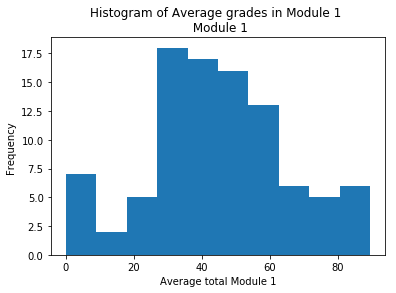

In [73]:
module1lg.Average.plot('hist')
# Average
plt.title('Histogram of Average grades in Module 1 \n Module 1')
plt.xlabel('Average total Module 1')
plt.ylabel('Frequency ')


In [70]:
average_mean = np.mean(module1lg)
# Compute the mean


In [71]:
print(average_mean)
# Print the results with some nice formatting


id                   61.684211
% CA                 43.726316
% exam               46.747368
Average              45.236842
Final(Rounded Up)    45.421053
dtype: float64


In [74]:
module1lg.describe().transpose()
# Moodle 1 lecture grades
# 95 Moodle grades

,count,mean,std,min,25%,50%,75%,max
id,95.0,61.684211,36.011010,2.0,29.5,64.0,92.50,122.0
% CA,95.0,43.726316,20.434348,0.0,32.5,42.0,56.00,90.0
% exam,95.0,46.747368,22.961563,0.0,35.0,44.0,62.00,90.0
Average,95.0,45.236842,20.576898,0.0,35.0,44.0,56.75,89.5
Final(Rounded Up),95.0,45.421053,20.606020,0.0,35.0,44.0,57.00,90.0


In [75]:
# Exploring 1 column final
final1 = module1lg['Final(Rounded Up)']

In [76]:
final1.value_counts().sort_index()

0     4
3     1
7     1
8     1
10    1
17    1
22    1
24    1
26    1
27    2
29    1
30    2
31    2
32    1
35    6
36    7
37    2
40    2
41    6
42    1
43    3
44    1
45    3
46    1
47    2
48    2
50    3
51    3
52    1
53    2
54    1
55    2
56    1
57    3
58    1
60    2
61    1
62    2
64    1
65    1
67    1
68    2
71    1
74    2
76    2
81    1
82    2
84    1
88    2
90    1
Name: Final(Rounded Up), dtype: int64

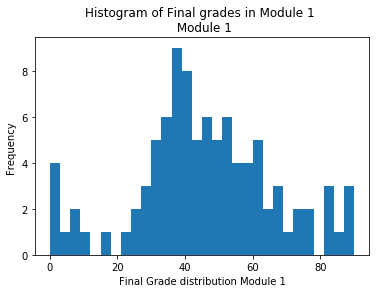

In [80]:
plt.hist(final1.dropna(),bins=30)
plt.title('Histogram of Final grades in Module 1 \n Module 1')
plt.xlabel('Final Grade distribution Module 1')
plt.ylabel('Frequency ')

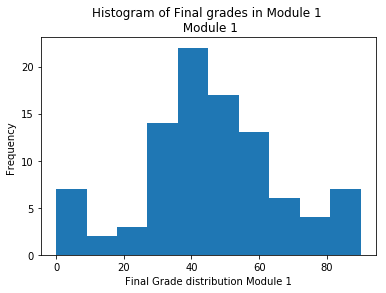

In [79]:
module1lg['Final(Rounded Up)'].plot('hist')
plt.title('Histogram of Final grades in Module 1 \n Module 1')
plt.xlabel('Final Grade distribution Module 1')
plt.ylabel('Frequency ')

In [89]:
fail1 = module1lg['Final(Rounded Up)'] < 40

In [90]:
fail1.sum()

35

In [91]:
disengaged1 = module1lg['Final(Rounded Up)'] < 55

In [92]:
disengaged1.sum()

66

In [95]:
# Filter the election DataFrame with the high_turnout array: high_turnout_df
disengaged1_df = module1lg.loc[disengaged1]

In [96]:
disengaged1_df
# the list of users who failed

,id,Student Id,Name,% CA,% exam,Average,Final(Rounded Up)
0,105,iV38mp5J,"bmp5, aV38",33,37,35.0,35
1,38,wTka80ff,"b80f, aTka",44,46,45.0,45
2,64,ond9WT1D,"bWT1, and9",42,63,52.5,53
3,79,7Ww4gbRf,"bgbR, aWw4",46,36,41.0,41
4,101,DpJQOQ2F,"bOQ2, apJQ",20,0,10.0,10
5,40,z7nAx4iB,"bx4i, a7nA",24,28,26.0,26
6,50,LmZdJI1B,"bJI1, amZd",14,0,7.0,7
7,48,I0V11X9O,"b1X9, a0V1",30,51,40.5,41
9,98,UnsWuTWC,"buTW, ansW",6,0,3.0,3
10,89,V4gLk3Vw,"bk3V, a4gL",36,35,35.5,36


In [97]:
engaged1 = module1lg['Final(Rounded Up)'] > 55

In [98]:
engaged1.sum()
# 27 out of 120 students are classed as engaged

27

In [100]:
# Using 'passed1' as the column name 
# and equating it to the list 
module1lg['Engaged Students Module 1'] = engaged1 

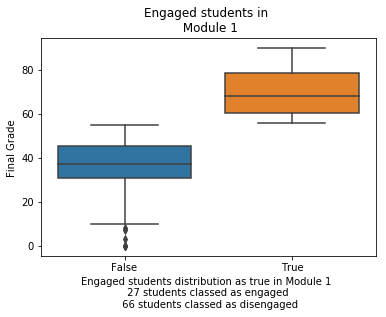

In [104]:
sns.boxplot(x = 'Engaged Students Module 1', y = 'Final(Rounded Up)', data = module1lg)
plt.title('Engaged students in \n Module 1')
plt.xlabel('Engaged students distribution as true in Module 1 \n 27 students classed as engaged \n 66 students classed as disengaged')
plt.ylabel('Final Grade ')

In [105]:
# Group Module Lecture Grades  by 'Churn' and compute the mean
print(module1lg.groupby(['Engaged Students Module 1']).mean())


                                  id       % CA     % exam    Average  \
Engaged Students Module 1                                               
False                      62.955882  34.500000  36.544118  35.522059   
True                       58.481481  66.962963  72.444444  69.703704   

                           Final(Rounded Up)  Engaged Student Module 1  
Engaged Students Module 1                                               
False                              35.691176                     False  
True                               69.925926                      True  


In [106]:
engaged1.mean()
# Average passed score was 6

0.28421052631578947

In [ ]:
# 
#


In [107]:
m1mg_subset = module1mg.drop(module1mg[['Quiz: Late MCQ2 (Real)','Assignment: Late Practical (Real)','Email address','Last downloaded from this course','Assignment: Group 1 - Practical Test (Real)','Assignment: Group 2 - Practical Test (Real)','Assignment: Group 3 - Practical Test (Real)','Assignment: Group 4 - Practical Test (Real)','Assignment: Group 5 - Practical Test (Real)','Assignment: Group 6 - Practical Test (Real)','Assignment: Group 7 - Practical Test (Real)']], axis=1)

In [108]:
m1mg_subset.head(2)

,First name,Surname,ID number,Course total (Real),Quiz: Group 1 MCQ (Real),Quiz: Group 1 - MCQ2 (Real),Quiz: Group 2 MCQ (Real),Quiz: Group 2 - MCQ2 (Real),Quiz: Group 3 MCQ (Real),Quiz: Group 3 - MCQ2 (Real),Quiz: Group 4 MCQ (Real),Quiz: Group 4 - MCQ2 (Real),Quiz: Group 5 MCQ (Real),Quiz: Group 5 - MCQ2 (Real),Quiz: Group 6 MCQ (Real),Quiz: Group 6 - MCQ2 (Real),Quiz: Group 7 MCQ (Real),Quiz: Group 7 - MCQ2 (Real),Quiz: Late MCQ1 (Real),engaged
0,a8NM,bDqB,U8NMDqBG,46.67,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0
1,aSnR,bGk9,VSnRGk9O,36.67,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
m1mg_subset.dtypes

First name                      object
Surname                         object
ID number                       object
Course total (Real)            float64
Quiz: Group 1 MCQ (Real)         int64
Quiz: Group 1 - MCQ2 (Real)      int64
Quiz: Group 2 MCQ (Real)         int64
Quiz: Group 2 - MCQ2 (Real)      int64
Quiz: Group 3 MCQ (Real)         int64
Quiz: Group 3 - MCQ2 (Real)      int64
Quiz: Group 4 MCQ (Real)         int64
Quiz: Group 4 - MCQ2 (Real)      int64
Quiz: Group 5 MCQ (Real)         int64
Quiz: Group 5 - MCQ2 (Real)      int64
Quiz: Group 6 MCQ (Real)         int64
Quiz: Group 6 - MCQ2 (Real)      int64
Quiz: Group 7 MCQ (Real)         int64
Quiz: Group 7 - MCQ2 (Real)      int64
Quiz: Late MCQ1 (Real)           int64
engaged                          int64
dtype: object

In [110]:
m1mg_subset.head(2)

,First name,Surname,ID number,Course total (Real),Quiz: Group 1 MCQ (Real),Quiz: Group 1 - MCQ2 (Real),Quiz: Group 2 MCQ (Real),Quiz: Group 2 - MCQ2 (Real),Quiz: Group 3 MCQ (Real),Quiz: Group 3 - MCQ2 (Real),Quiz: Group 4 MCQ (Real),Quiz: Group 4 - MCQ2 (Real),Quiz: Group 5 MCQ (Real),Quiz: Group 5 - MCQ2 (Real),Quiz: Group 6 MCQ (Real),Quiz: Group 6 - MCQ2 (Real),Quiz: Group 7 MCQ (Real),Quiz: Group 7 - MCQ2 (Real),Quiz: Late MCQ1 (Real),engaged
0,a8NM,bDqB,U8NMDqBG,46.67,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0
1,aSnR,bGk9,VSnRGk9O,36.67,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
Xm1mg = m1mg_subset.iloc[:,4:19]  #independent columns
ym1mg = m1mg_subset.iloc[:,-1]    #target column i.e engaged

In [112]:
Xm1mg.head(2)

,Quiz: Group 1 MCQ (Real),Quiz: Group 1 - MCQ2 (Real),Quiz: Group 2 MCQ (Real),Quiz: Group 2 - MCQ2 (Real),Quiz: Group 3 MCQ (Real),Quiz: Group 3 - MCQ2 (Real),Quiz: Group 4 MCQ (Real),Quiz: Group 4 - MCQ2 (Real),Quiz: Group 5 MCQ (Real),Quiz: Group 5 - MCQ2 (Real),Quiz: Group 6 MCQ (Real),Quiz: Group 6 - MCQ2 (Real),Quiz: Group 7 MCQ (Real),Quiz: Group 7 - MCQ2 (Real),Quiz: Late MCQ1 (Real)
0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0
1,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
ym1mg.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [114]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xm1mg,ym1mg)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm1mg.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

                          Specs       Score
5   Quiz: Group 3 - MCQ2 (Real)  123.895819
4      Quiz: Group 3 MCQ (Real)   77.329883
13  Quiz: Group 7 - MCQ2 (Real)   16.171968
10     Quiz: Group 6 MCQ (Real)   15.307254
11  Quiz: Group 6 - MCQ2 (Real)   10.761945
6      Quiz: Group 4 MCQ (Real)    9.198738
12     Quiz: Group 7 MCQ (Real)    7.764177
14       Quiz: Late MCQ1 (Real)    6.185567
9   Quiz: Group 5 - MCQ2 (Real)    5.548866
0      Quiz: Group 1 MCQ (Real)    0.862131


[ 0.02131065  0.06865927  0.07268767  0.01498805  0.17296617  0.11661747
  0.12016557  0.          0.03431798  0.09088531  0.11483463  0.04487947
  0.05333279  0.06879654  0.00555842]


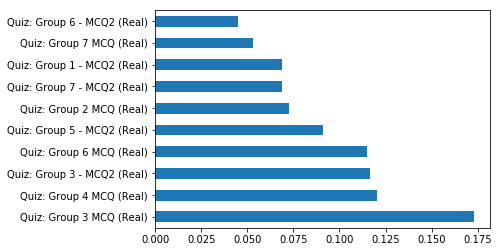

In [115]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm1mg,ym1mg)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm1mg.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

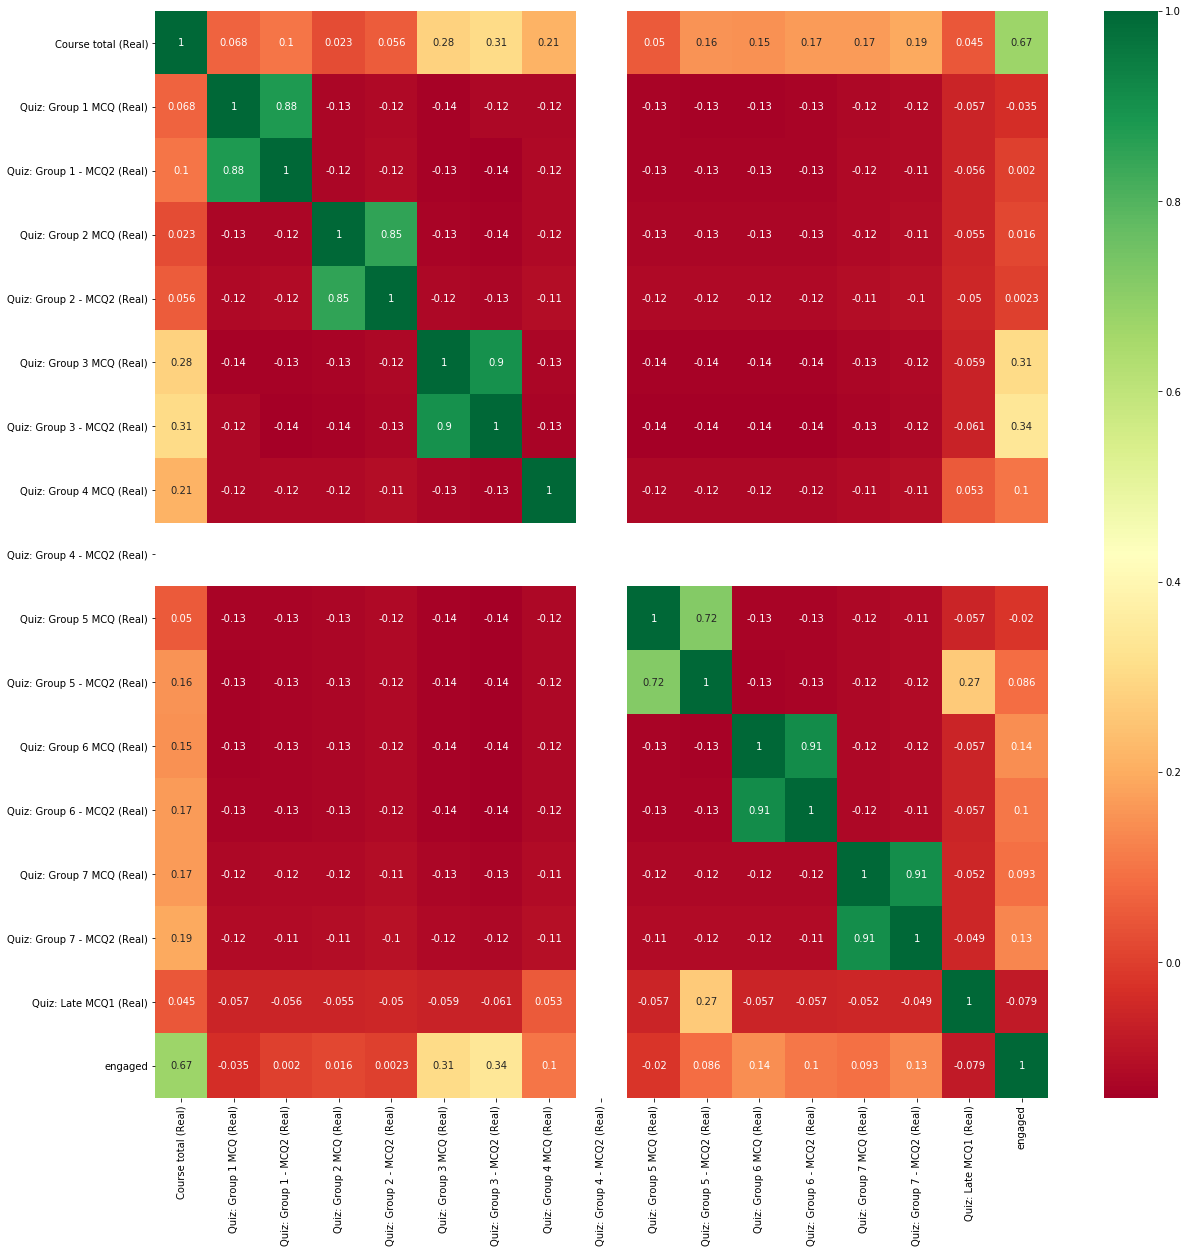

In [116]:
#get correlations of each features in dataset
corrmat = m1mg_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m1mg_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [118]:
# Print the number of unique values in each modul1lg column
print(module1mg.nunique())
# Remove the columns with 
# Important to remove unesscary values

First name                                     122
Surname                                        122
ID number                                      122
Email address                                  122
Course total (Real)                             20
Last downloaded from this course                 2
Assignment: Group 1 - Practical Test (Real)      1
Assignment: Group 2 - Practical Test (Real)      1
Assignment: Group 3 - Practical Test (Real)      1
Assignment: Group 4 - Practical Test (Real)      1
Assignment: Group 5 - Practical Test (Real)      1
Assignment: Group 6 - Practical Test (Real)      1
Assignment: Group 7 - Practical Test (Real)      1
Assignment: Late Practical (Real)                1
Quiz: Group 1 MCQ (Real)                         8
Quiz: Group 1 - MCQ2 (Real)                      8
Quiz: Group 2 MCQ (Real)                         8
Quiz: Group 2 - MCQ2 (Real)                      8
Quiz: Group 3 MCQ (Real)                         9
Quiz: Group 3 - MCQ2 (Real)    

In [119]:
module1ml_sklearn = module1ml.copy()
# module1ml_sklearn = module1ml.copy()
# label encoding using scikit-learn's LabelEncoder
lb_make = LabelEncoder()
module1ml_sklearn['Event name'] = lb_make.fit_transform(module1ml['Event name'])
module1ml_sklearn.head() #Results in appending a new column to df

# Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, 
# but it has as disadvantage that the numerical values can be misinterpreted by the algorithm.
#


,Time,User full name,Event context,Component,Event name,Date,First name,Last name
136,21:48,a7t7 bfTq,Course: Module 1,User report,11,2019-01-02,a7t7,bfTq
137,21:48,a7t7 bfTq,Course: Module 1,System,7,2019-01-02,a7t7,bfTq
286,21:52,aRY9 bwYJ,File: Lecture 1,File,4,2019-01-21,aRY9,bwYJ
287,21:52,aRY9 bwYJ,Course: Module 1,System,7,2019-01-21,aRY9,bwYJ
288,20:29,ansW buTW,Course: Module 1,System,7,2019-01-21,ansW,buTW


In [120]:
module1ml_onehot = module1ml.copy()
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Event name'], prefix = ['Event name'])
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Event context'], prefix = ['Event context'])
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Component'], prefix = ['Component'])


print(module1ml_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



       Time User full name       Date First name Last name  \
136   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
137   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
286   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
287   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
288   20:29      ansW buTW 2019-01-21       ansW      buTW   

     Event name_A file has been uploaded.  \
136                                     0   
137                                     0   
286                                     0   
287                                     0   
288                                     0   

     Event name_A submission has been submitted.  \
136                                            0   
137                                            0   
286                                            0   
287                                            0   
288                                            0   

     Event name_Badge listing viewed  \
136

In [121]:
module1ml_onehot.dtypes


Time                                                                         object
User full name                                                               object
Date                                                                 datetime64[ns]
First name                                                                   object
Last name                                                                    object
Event name_A file has been uploaded.                                          uint8
Event name_A submission has been submitted.                                   uint8
Event name_Badge listing viewed                                               uint8
Event name_Course module instance list viewed                                 uint8
Event name_Course module viewed                                               uint8
Event name_Course searched                                                    uint8
Event name_Course user report viewed                                        

In [ ]:
# Merge1
#
#
#
#

In [122]:
# Onehot1 merge
merge_subset1 = pd.merge(module1ml_onehot,m1mg_subset[['First name','engaged']],on='First name', how='left')


In [150]:
merge_subset1

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report,engaged
0,21:48,a7t7 bfTq,2019-01-02,a7t7,bfTq,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21:48,a7t7 bfTq,2019-01-02,a7t7,bfTq,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,21:52,aRY9 bwYJ,2019-01-21,aRY9,bwYJ,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,21:52,aRY9 bwYJ,2019-01-21,aRY9,bwYJ,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20:29,ansW buTW,2019-01-21,ansW,buTW,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,19:54,aKpv bLk6,2019-01-21,aKpv,bLk6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,19:54,aKpv bLk6,2019-01-21,aKpv,bLk6,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,19:11,ansW buTW,2019-01-21,ansW,buTW,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,19:07,ansW buTW,2019-01-21,ansW,buTW,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,19:05,asqg bbCp,2019-01-21,asqg,bbCp,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [123]:
merge_subset1.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report,engaged
0,21:48,a7t7 bfTq,2019-01-02,a7t7,bfTq,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21:48,a7t7 bfTq,2019-01-02,a7t7,bfTq,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [125]:
merge_subset1.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report,engaged
0,21:48,a7t7 bfTq,2019-01-02,a7t7,bfTq,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21:48,a7t7 bfTq,2019-01-02,a7t7,bfTq,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [129]:
X1s = merge_subset1.iloc[:,5:88]  #independent columns
y1s = merge_subset1.iloc[:,-1]    #target column i.e engaged


In [130]:
X1s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion created,Event name_Discussion viewed,...,Event context_URL: online Rjf guide,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [131]:
y1s.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [132]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1s,y1s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
31  Event context_Assignment: Group 3 - Practical ...  65.788602
63                    Event context_Quiz: Group 3 MCQ  36.772765
39               Event context_File: Lab 10 Worksheet  22.103855
46                Event context_File: Lab 8 Worksheet  15.977438
54                      Event context_File: Lecture 6   8.051252
58           Event context_File: Provisional CA Marks   7.979629
6                Event name_Course user report viewed   7.091281
75                                     Component_File   7.091171
29  Event context_Assignment: Group 1 - Practical ...   6.446768
67                      Event context_Quiz: Late MCQ1   6.380721


[  1.73988838e-03   1.24566821e-03   2.44508187e-04   6.85569935e-04
   1.30798612e-02   1.17190888e-03   2.38596099e-02   6.45917247e-03
   4.76820588e-04   3.66368419e-03   9.88926317e-05   3.66737472e-03
   4.05145500e-04   1.35183371e-03   2.75549066e-04   5.54226612e-04
   4.91607577e-03   3.98195041e-03   3.07527407e-04   1.09762170e-03
   2.02720783e-03   7.65756163e-03   1.54535425e-03   3.29747697e-03
   9.80508018e-04   7.50414112e-04   4.49325349e-04   3.40719831e-04
   2.56063575e-03   2.79738530e-02   1.18871628e-02   2.06673732e-01
   1.69384703e-02   1.80632583e-02   7.96296177e-03   1.17904695e-02
   1.12338387e-02   4.23491696e-04   1.04475340e-03   8.76760022e-02
   6.56584935e-03   4.73132537e-04   8.03658918e-04   5.55302520e-04
   2.00141668e-02   1.58702146e-02   7.36039727e-02   7.04311224e-04
   1.34090758e-03   1.57659629e-02   9.79278727e-03   8.69227103e-04
   4.22725024e-03   8.18090801e-03   2.04088415e-02   3.05685690e-03
   4.49232308e-03   1.41495285e-03

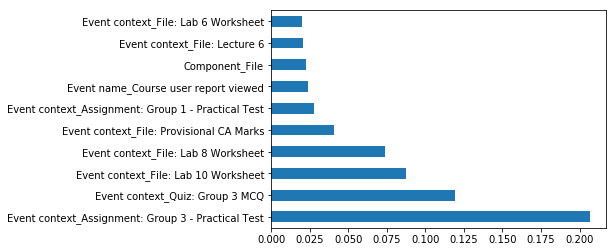

In [133]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X1s,y1s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


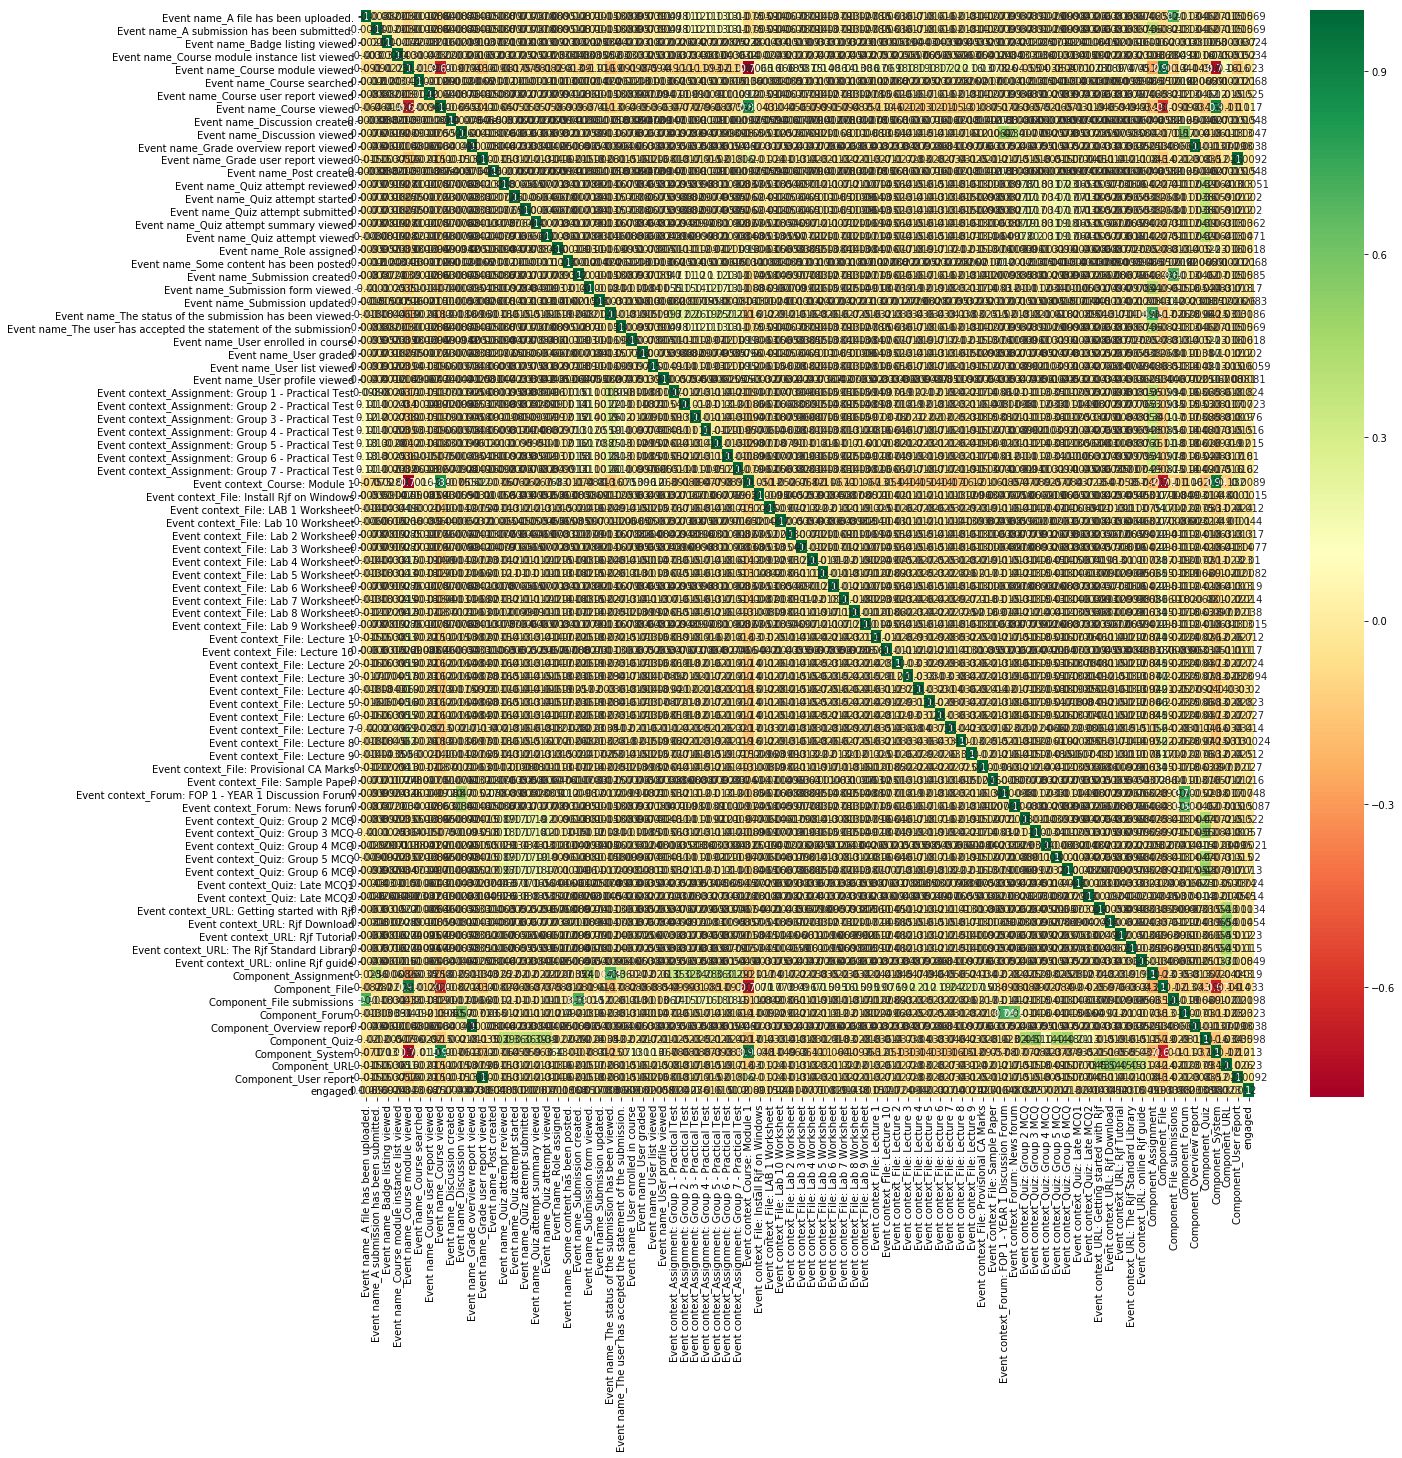

In [134]:
#get correlations of each features in dataset
corrmat = merge_subset1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset1[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [137]:
featselect1 = X1s[['Event context_Assignment: Group 3 - Practical Test','Event context_Quiz: Group 3 MCQ','Event context_File: Lab 10 Worksheet','Event context_File: Lab 8 Worksheet','Event context_File: Provisional CA Marks','Event context_Assignment: Group 1 - Practical Test','Event name_Course user report viewed','Component_File','Event context_File: Lecture 6','Event context_File: Lab 6 Worksheet']]


In [147]:
featselect1.head(2)

,Event context_Assignment: Group 3 - Practical Test,Event context_Quiz: Group 3 MCQ,Event context_File: Lab 10 Worksheet,Event context_File: Lab 8 Worksheet,Event context_File: Provisional CA Marks,Event context_Assignment: Group 1 - Practical Test,Event name_Course user report viewed,Component_File,Event context_File: Lecture 6,Event context_File: Lab 6 Worksheet
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0


In [148]:
yfs.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [139]:
Xfs = featselect1 # Features
yfs = y1s # Target variable

In [151]:
# Split dataset into training set and test set
Xfs_train, Xfs_test, yfs_train, yfs_test = train_test_split(Xfs, yfs, test_size=0.3, random_state=1) # 70% training and 30% test

In [152]:
# Create Decision Tree classifer object
dtclffs = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs = dtclffs.fit(Xfs_train,yfs_train)

#Predict the response for test dataset
yfs_pred = dtclffs.predict(Xfs_test)

In [153]:
print("Accuracy:",metrics.accuracy_score(yfs_test, yfs_pred))
print("Precision:",metrics.precision_score(yfs_test, yfs_pred))
print("Recall:",metrics.recall_score(yfs_test, yfs_pred))
print("F1 Score",metrics.f1_score(yfs_test, yfs_pred))

Accuracy: 0.792200232829
Precision: 0.0
Recall: 0.0
F1 Score 0.0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [154]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs_test, yfs_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs_test, yfs_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs_test, yfs_pred)))

Mean Absolute Error: 0.207799767171
Mean Squared Error: 0.207799767171
Root Mean Squared Error: 0.455850597423


In [155]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs1 = LogisticRegression()

# fit the model with data
logregfs1.fit(Xfs_train,yfs_train)

#
ylg1_pred=logregfs1.predict(Xfs_test)


In [156]:
# import the metrics class
from sklearn import metrics
cnflr1_matrix = metrics.confusion_matrix(yfs_test, ylg1_pred)
cnflr1_matrix


array([[2722,    0],
       [ 714,    0]], dtype=int64)

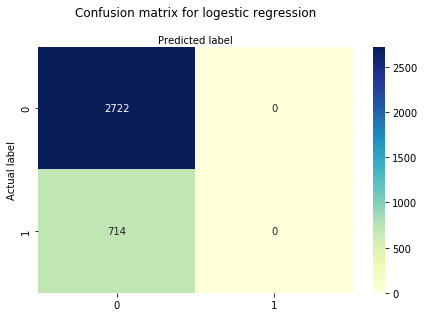

In [157]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr1_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for logestic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


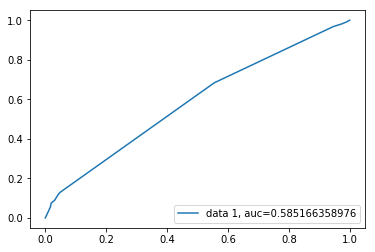

In [158]:
ylg1_pred_proba = logregfs1.predict_proba(Xfs_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs_test,  ylg1_pred_proba)
auc = metrics.roc_auc_score(yfs_test, ylg1_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.54. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


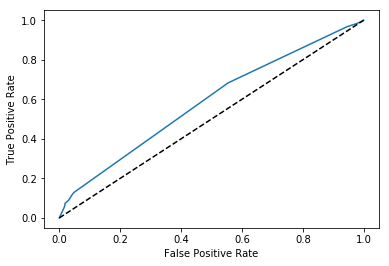

In [162]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs_test, ylg1_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [159]:
# Instantiate the classifier
rfclffs1 = RandomForestClassifier()

# Fit to the training data
rfclffs1.fit(Xfs_train, yfs_train)

# Compute accuracy
print(rfclffs1.score(Xfs_test, yfs_test))


0.792200232829


In [160]:
from sklearn.svm import SVC

svcfs1 = SVC()

#Train it, or "fit it", to the data:
svcfs1.fit(Xfs_train, yfs_train)

# Compute accuracy
print(svcfs1.score(Xfs_test, yfs_test))


0.792200232829


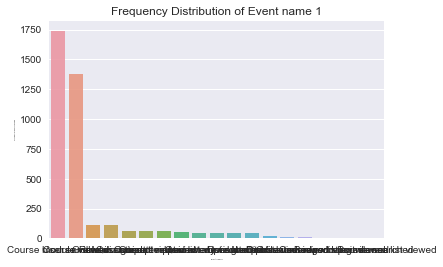

In [165]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
eventname1_count = FirstFive1['Event name'].value_counts()
sns.set(style="darkgrid")
sns.barplot(eventname1_count.index, eventname1_count.values, alpha=0.9)
plt.title('Frequency Distribution of Event name 1')
plt.ylabel('Number of Occurrences', fontsize=2)
plt.xlabel('Event name 1', fontsize=2)
plt.show()

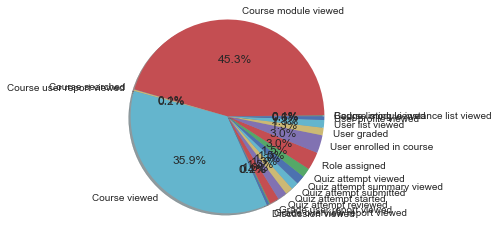

In [166]:
labels = FirstFive1['Event name'].astype('category').cat.categories.tolist()
counts = FirstFive1['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()